In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insuarnce_OH = pd.get_dummies(insurance)

In [ ]:
#Create X and Y values
X = insuarnce_OH.drop("charges", axis = 1)
Y = insuarnce_OH["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float32)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.01),
              metrics=["mae"])
history= model.fit(X_train, Y_train, epochs=130)

Epoch 1/130
34/34 [==============================] - 1s 2ms/step - loss: 10293.5654 - mae: 10293.5654
Epoch 2/130
34/34 [==============================] - 0s 3ms/step - loss: 7339.0029 - mae: 7339.0029
Epoch 3/130
34/34 [==============================] - 0s 3ms/step - loss: 6935.4331 - mae: 6935.4331
Epoch 4/130
34/34 [==============================] - 0s 3ms/step - loss: 6544.2969 - mae: 6544.2969
Epoch 5/130
34/34 [==============================] - 0s 3ms/step - loss: 6391.4175 - mae: 6391.4175
Epoch 6/130
34/34 [==============================] - 0s 3ms/step - loss: 6094.2085 - mae: 6094.2085
Epoch 7/130
34/34 [==============================] - 0s 3ms/step - loss: 5757.7314 - mae: 5757.7314
Epoch 8/130
34/34 [==============================] - 0s 3ms/step - loss: 4886.5986 - mae: 4886.5986
Epoch 9/130
34/34 [==============================] - 0s 3ms/step - loss: 3845.1716 - mae: 3845.1716
Epoch 10/130
34/34 [==============================] - 0s 3ms/step - loss: 3607.0969 - mae: 3607.09

Text(0.5, 0, 'epochs')

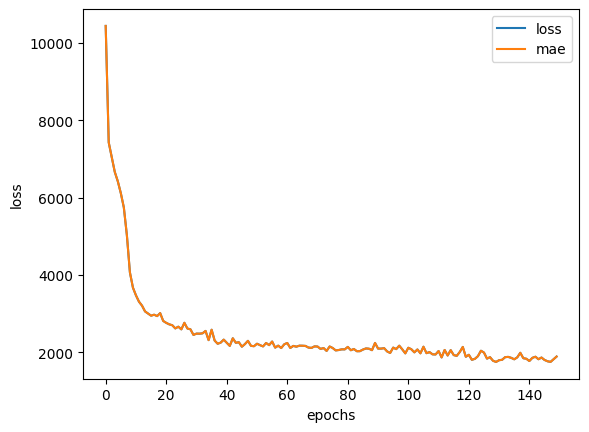

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")